# Business problem:-

# Given City ,Brand ,Model,Price/Unit ,Amount,date,RAM and Internal memory we have to predict Quantity and Amount

In [62]:
import pandas as pd
data=pd.read_csv(r"C:\Users\91996\Desktop\ML\PredictiVu\data.csv")

In [23]:
data.head()

,serialNo,City,Brand,Model,Price/Unit,Quantity,Amount,Date,RAM,Internal Memory
0,195,Delhi,Brand 3,Model 22,8990,1,8990.0,9/27/2020,Feature1_1,Feature2_1
1,196,Delhi,Brand 3,Model 40,8990,1,8990.0,9/27/2020,Feature1_1,Feature2_1
2,197,Delhi,Brand 10,Model 86,11490,1,11490.0,9/27/2020,Feature1_1,Feature2_2
3,198,Delhi,Brand 1,Model 29,3600,1,3600.0,9/27/2020,Feature1_2,NaN
4,416,Kolkata,Brand 1,Model 115,11999,1,11999.0,9/27/2020,Feature1_3,Feature2_2


# Data Preprocessing:-

# Handling missing values:-

In [153]:
data.isna().sum()

serialNo             0
City                 0
Brand                0
Model                0
Price/Unit           0
Quantity             0
Amount               0
Date                 0
RAM                156
Internal Memory    859
dtype: int64

# As RAM and Internal Memory are both categorical in nature ,we impute the missing values as a new category

In [63]:
data.RAM=data.RAM.fillna("Feature_10001")
data['Internal Memory']=data['Internal Memory'].fillna("Feature_1001")

In [64]:
data.isna().sum()

serialNo           0
City               0
Brand              0
Model              0
Price/Unit         0
Quantity           0
Amount             0
Date               0
RAM                0
Internal Memory    0
dtype: int64

In [65]:
data['Brand']=[i.split()[1] for i in data.Brand]
data['Model']=[i.split()[1] for i in data.Model]
data['RAM']=[i.split("_")[1] for i in data.RAM]
data['Internal Memory']=[i.split("_")[1] for i in data['Internal Memory']]

In [185]:
data.head()

,serialNo,City,Brand,Model,Price/Unit,Quantity,Amount,Date,RAM,Internal Memory
0,195,Delhi,3,22,8990,1,8990.0,9/27/2020,1,1
1,196,Delhi,3,40,8990,1,8990.0,9/27/2020,1,1
2,197,Delhi,10,86,11490,1,11490.0,9/27/2020,1,2
3,198,Delhi,1,29,3600,1,3600.0,9/27/2020,2,1001
4,416,Kolkata,1,115,11999,1,11999.0,9/27/2020,3,2


In [66]:
del data['serialNo']

In [67]:
data['Brand']=pd.to_numeric(data['Brand'], errors='coerce') 
data['Model']=pd.to_numeric(data['Model'], errors='coerce') 
data['RAM']=pd.to_numeric(data['RAM'], errors='coerce') 
data['Internal Memory']=pd.to_numeric(data['Internal Memory'], errors='coerce') 
import seaborn as sns



# Handling Outliers

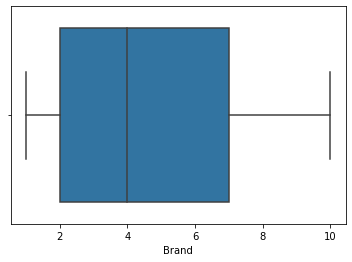

In [99]:
sns.boxplot(x=data["Brand"])

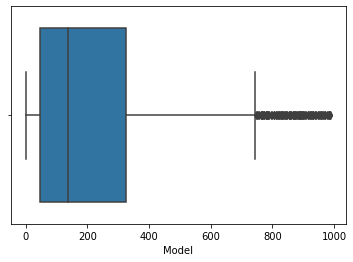

In [160]:
sns.boxplot(x=data["Model"])

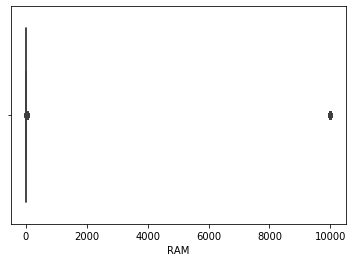

In [102]:
sns.boxplot(x=data["RAM"])

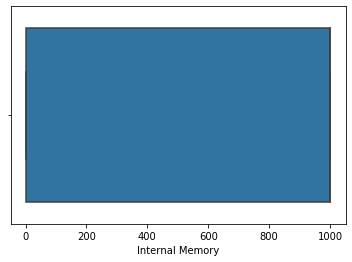

In [103]:
sns.boxplot(x=data['Internal Memory'])

# So as there are outliers we need to handle them by using IQR
# IQR=Q3-Q1
# We keep only those values which are in the range of lower and upper bracket
# Lower Bracket=Q1-(1.5*IQR) and Higher Bracket=Q1+(1.5*IQR) 

In [68]:
import numpy as np
q1=np.percentile(data.Model,25)
q3=np.percentile(data.Model,75)
iqr=q3-q1
lower_bracket=q1-(1.5*iqr)
upper_bracket=q3+(1.5*iqr)

In [69]:
print(q1,q3,iqr,lower_bracket,upper_bracket)

48.0 327.0 279.0 -370.5 745.5


In [70]:
model_outliers_list=[]
for i in data.Model:
    if i >=lower_bracket and i<=upper_bracket:
        pass
    else:
        model_outliers_list.append(i)

In [71]:
index_names=[]
for i in model_outliers_list:
    index_names.append(data[data['Model']==i].index)

In [72]:
for i in index_names:
    data.drop(i, inplace = True)

In [73]:
q1_ram=np.percentile(data.RAM,25)
q3_ram=np.percentile(data.RAM,75)
iqr_ram=q3_ram-q1_ram
lower_bracket_ram=q1_ram-(1.5*iqr_ram)
upper_bracket_ram=q3_ram+(1.5*iqr_ram)

In [74]:
print(q1_ram,q3_ram,iqr_ram,lower_bracket_ram,upper_bracket_ram)

3.0 9.0 6.0 -6.0 18.0


In [75]:
ram_outliers_list=[]
for i in data.RAM:
    if i >=lower_bracket_ram and i<=upper_bracket_ram:
        pass
    else:
        ram_outliers_list.append(i)



In [76]:
index_names_RAM=[]
for i in ram_outliers_list:
    index_names_RAM.append(data[data['RAM']==i].index)



In [77]:
index_names=index_names_RAM[0]

In [78]:
for i in index_names:
    data.drop(i, inplace = True)

In [79]:
data

,City,Brand,Model,Price/Unit,Quantity,Amount,Date,RAM,Internal Memory
0,Delhi,3,22,8990,1,8990.0,9/27/2020,1,1
1,Delhi,3,40,8990,1,8990.0,9/27/2020,1,1
2,Delhi,10,86,11490,1,11490.0,9/27/2020,1,2
3,Delhi,1,29,3600,1,3600.0,9/27/2020,2,1001
4,Kolkata,1,115,11999,1,11999.0,9/27/2020,3,2
...,...,...,...,...,...,...,...,...,...
1692,Lucknow,1,51,1650,1,1410.0,10/6/2020,6,1001
1693,Lucknow,3,509,12500,1,12500.0,10/6/2020,3,2
1694,Lucknow,9,415,1650,1,1410.0,10/8/2020,6,1001
1695,Chennai,7,139,8590,1,8590.0,10/5/2020,8,1


# Multivariate Analysis:-

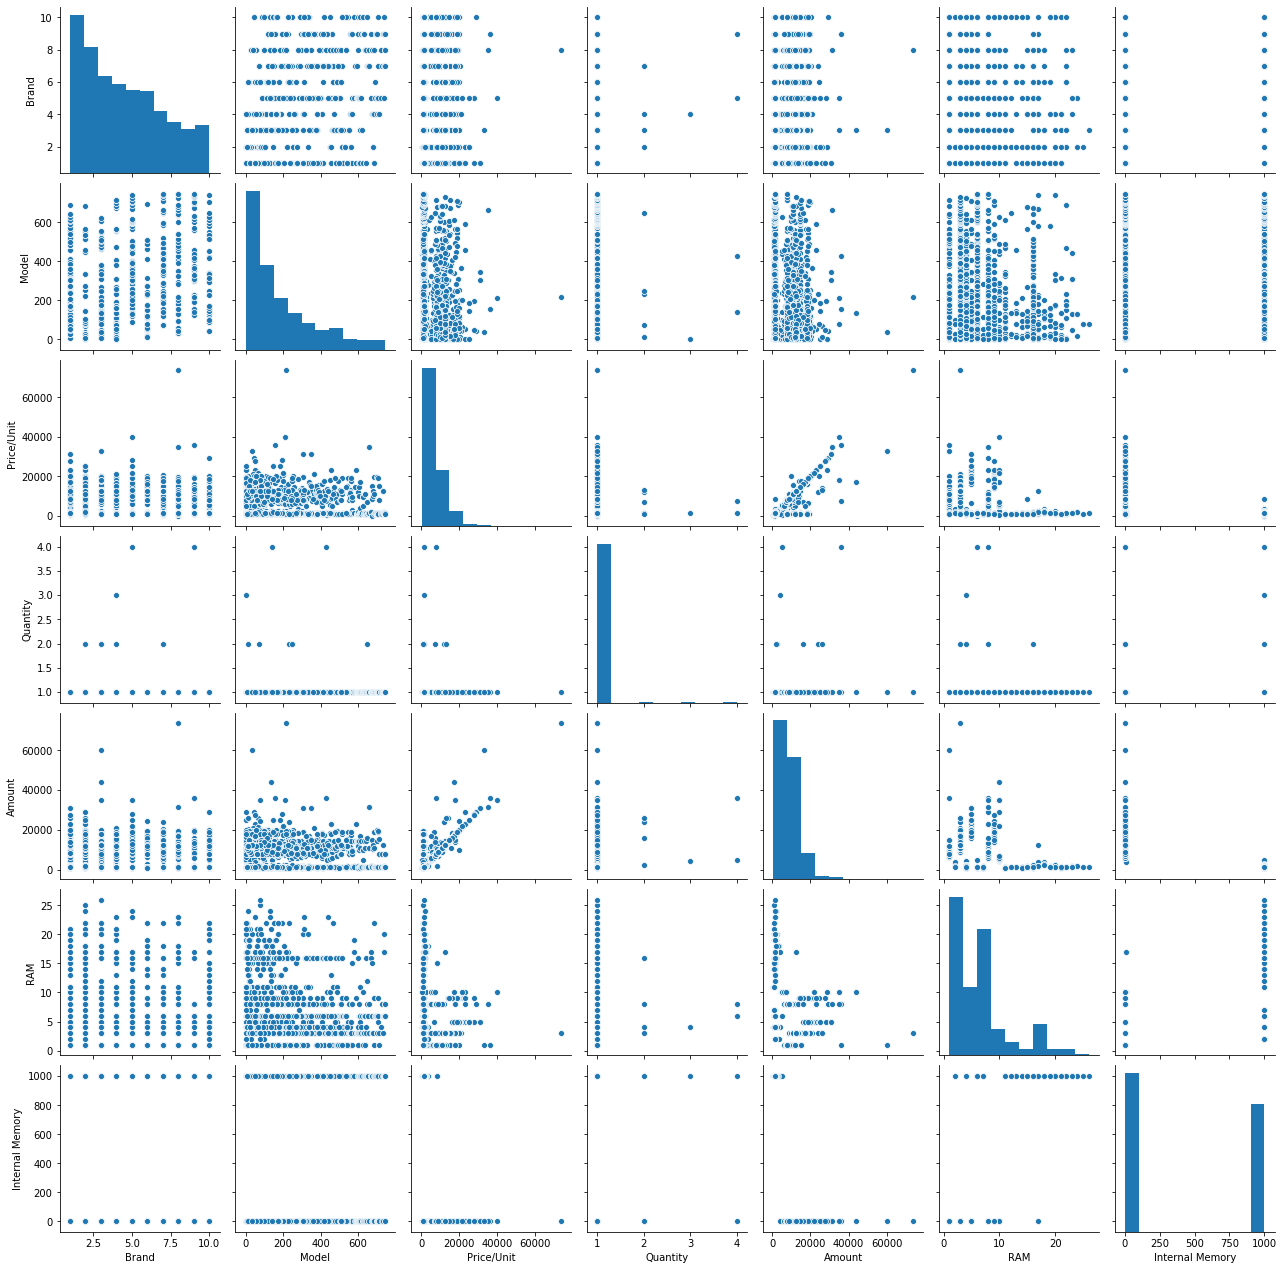

In [209]:
sns.pairplot(data)

# Feature Engineering:-

In [80]:
data.City.unique()

array(['Delhi', 'Kolkata', 'Chennai', 'Ahmedabad', 'Lucknow', 'Ludhiana',
       'Kanpur', 'Thiruvananthapuram', 'Hyderabad', 'Mumbai', 'Surat',
       'Bangalore'], dtype=object)

In [81]:
data['Date']=pd.to_datetime(data.Date)

In [82]:
data['month']=list(data.Date.dt.month)
data['day']=list(data.Date.dt.day)
data['weekofyear']=list(data.Date.dt.weekofyear)
data['quarter']=list(data.Date.dt.quarter)
data['dayofweek']=list(data.Date.dt.dayofweek)

C:\Users\91996\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [83]:
del data['Date']

In [84]:
mapping_city=dict(data.City.value_counts())

In [29]:
mapping_city

{'Lucknow': 525,
 'Delhi': 387,
 'Kolkata': 230,
 'Chennai': 123,
 'Ludhiana': 61,
 'Thiruvananthapuram': 59,
 'Kanpur': 39,
 'Hyderabad': 12,
 'Bangalore': 8,
 'Ahmedabad': 6,
 'Mumbai': 3,
 'Surat': 1}

In [85]:
data.loc[:, "City"] = data.City.map(mapping_city)

In [86]:
quantity_list=list(data.Quantity)
Amount_list=list(data.Amount)
del data['Quantity']
del data['Amount']

In [87]:
y=[]
for i in range(len(quantity_list)):
    new_list=[]
    new_list.append(quantity_list[i])
    new_list.append(Amount_list[i])
    y.append(new_list)

In [88]:
y=np.asarray(y)

# Feature Selection:-

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.20, random_state=42)

In [90]:
data['Internal Memory'].unique()

array([   1,    2, 1001,    3,    4,    5,    6], dtype=int64)

In [91]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestRegressor

In [260]:
forward_selection=SFS(RandomForestRegressor(n_estimators=200,random_state=10,n_jobs=-1),
    k_features=11,forward=True,floating=False,verbose=2,scoring='neg_root_mean_squared_error',
   cv=5,n_jobs=-1).fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  11 | elapsed:    4.4s remaining:   20.2s
[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    5.4s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    7.8s finished

[2021-08-11 17:03:34] Features: 1/11 -- score: -1548.1891422747424[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    5.3s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.7s finished

[2021-08-11 17:03:42] Features: 2/11 -- score: -1228.8175717760798[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:    5.6s remaining:    7.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    7.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    7.8s finished

[2021-08-11 17:03:5

In [263]:
forward_selection_subset=SFS(RandomForestRegressor(n_estimators=200,random_state=10,n_jobs=-1),
    k_features=9,forward=True,floating=False,verbose=2,scoring='neg_root_mean_squared_error',
   cv=5,n_jobs=-1).fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  11 | elapsed:    4.1s remaining:   18.9s
[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    4.8s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    7.2s finished

[2021-08-11 17:06:04] Features: 1/9 -- score: -1548.1891422747424[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    4.9s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.4s finished

[2021-08-11 17:06:11] Features: 2/9 -- score: -1228.8175717760798[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:    6.6s remaining:    8.2s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    9.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    9.3s finished

[2021-08-11 17:06:20]

In [264]:
forward_selection_subset.k_feature_names_

('City',
 'Brand',
 'Model',
 'Price/Unit',
 'RAM',
 'Internal Memory',
 'day',
 'weekofyear',
 'dayofweek')

In [265]:
forward_selection_subset.k_score_

-1038.3048784500925

In [92]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [93]:
final_dataset_train=X_train[['City',
 'Brand',
 'Model',
 'Price/Unit',
 'RAM',
 'Internal Memory',
 'day',
 'weekofyear',
 'dayofweek']]
final_dataset_test=X_test[['City',
 'Brand',
 'Model',
 'Price/Unit',
 'RAM',
 'Internal Memory',
 'day',
 'weekofyear',
 'dayofweek']]

In [94]:
final_dataset_train

,City,Brand,Model,Price/Unit,RAM,Internal Memory,day,weekofyear,dayofweek
798,123,4,258,14499,3,2,5,41,0
283,387,2,76,10500,3,2,27,39,6
1272,230,2,7,15499,3,2,1,40,3
706,525,10,133,800,3,2,1,40,3
1466,525,2,28,1300,1,1,1,40,3
...,...,...,...,...,...,...,...,...,...
1229,387,2,6,1350,4,1001,7,41,2
1274,387,6,79,1200,16,1001,3,40,5
1474,525,2,15,10800,3,2,4,40,6
948,387,1,65,1300,20,1001,5,41,0


In [95]:
X_train_array=final_dataset_train.values
X_test_array=final_dataset_test.values

# Modelling:-

# Random forest

In [274]:
n_estimators=[100,150,200]
max_depth=[20,30,40,None]
min_samples_split=[2,4,6]
min_samples_leaf=[1,2,3,4]
max_features=[20,30,"auto","sqrt","log2"]
max_leaf_nodes=[None,2,4,8]
ccp_alpha=[0.0,0.00001,0.0001]

In [275]:
parameters=dict(n_estimators=n_estimators,max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,max_features=max_features,max_leaf_nodes=max_leaf_nodes,ccp_alpha=ccp_alpha)

In [281]:
rf_model=RandomForestRegressor(criterion='mse',bootstrap=True,n_jobs=-1,verbose=3)

In [282]:
from sklearn.model_selection import RandomizedSearchCV
crosscvrf=RandomizedSearchCV(estimator=rf_model,param_distributions=parameters,scoring='neg_root_mean_squared_error',n_jobs=-1,cv=8,verbose=3,return_train_score=True,n_iter=10)

In [283]:
random_forest_model=crosscvrf.fit(X_train,y_train)

Fitting 8 folds for each of 10 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s


building tree 1 of 150
building tree 2 of 150building tree 3 of 150

building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150building tree 15 of 150

building tree 16 of 150

building tree 17 of 150
building tree 18 of 150
building tree 19 of 150building tree 20 of 150building tree 21 of 150


building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150building tree 27 of 150
building tree 28 of 150

building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150building tree 33 of 150

building tree 34 of 150building tree 35 of 150

building tree 36 of 150
building tree 37 of 150building tree 38 of 150

building tree 39 of 150
building tree 40 of 150building tree 41 of 150
building tree 42 of 150
bu

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished


In [285]:
random_forest_model.best_params_

{'n_estimators': 150,
 'min_samples_split': 2,
 'min_samples_leaf': 3,
 'max_leaf_nodes': None,
 'max_features': 'log2',
 'max_depth': 20,
 'ccp_alpha': 1e-05}

In [292]:
rf_model_final=RandomForestRegressor(criterion='mse',bootstrap=True,n_jobs=-1,verbose=3,n_estimators=150,min_samples_split=2,min_samples_leaf=3,max_leaf_nodes=None,max_features='log2',max_depth= 20,ccp_alpha=1e-05)                                 
                             

In [293]:
Random_forest_Model=rf_model_final.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.1s


building tree 1 of 150building tree 2 of 150

building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150building tree 8 of 150

building tree 9 of 150building tree 10 of 150

building tree 11 of 150
building tree 12 of 150building tree 13 of 150building tree 14 of 150

building tree 15 of 150

building tree 16 of 150
building tree 17 of 150building tree 18 of 150

building tree 19 of 150
building tree 20 of 150building tree 21 of 150
building tree 22 of 150building tree 23 of 150
building tree 24 of 150


building tree 25 of 150building tree 26 of 150

building tree 27 of 150
building tree 28 of 150building tree 29 of 150

building tree 30 of 150building tree 31 of 150building tree 32 of 150


building tree 33 of 150building tree 34 of 150

building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150building tree 40 of 150

building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished


In [294]:
predicted_train_score=Random_forest_Model.predict(X_train)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    0.0s finished


In [302]:
from sklearn.metrics import *
mean_squared_error(y_train,predicted_train_score,squared=False)

908.0593734600176

In [304]:
predicted_test_score=Random_forest_Model.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    0.0s finished


In [305]:
mean_squared_error(y_test,predicted_test_score,squared=False)

1382.7296405041022

# KNN Regressor

In [104]:
n_neighbors=[5,10,15,20,40]
weights=['uniform','distance']
algorithm=['auto']
leaf_size=[15,30,45,50]
p=[1,2]
from sklearn.neighbors import KNeighborsRegressor
KNNReg=KNeighborsRegressor(n_jobs=-1,algorithm='auto')

In [105]:
parameters_KNN=dict(n_neighbors=n_neighbors,weights=weights,algorithm=algorithm,leaf_size=leaf_size,p=p)

In [106]:
from sklearn.model_selection import RandomizedSearchCV
crosscvknn=RandomizedSearchCV(estimator=KNNReg,param_distributions=parameters_KNN,scoring='neg_root_mean_squared_error',n_jobs=-1,cv=8,verbose=3,return_train_score=True,n_iter=10)

In [106]:
KNNModel=crosscvknn.fit(X_train_array,y_train)

Fitting 8 folds for each of 10 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    2.3s finished


In [107]:
KNNModel.best_params_

{'weights': 'uniform',
 'p': 2,
 'n_neighbors': 10,
 'leaf_size': 45,
 'algorithm': 'auto'}

In [108]:
KNNReg=KNeighborsRegressor(n_jobs=-1,algorithm='auto',weights='uniform',
 p=2,
 n_neighbors=10,
 leaf_size=45)

In [109]:
knn_model=KNNReg.fit(X_train_array,y_train)

In [110]:
train_predicted_knn=knn_model.predict(X_train_array)

In [111]:
from sklearn.metrics import *
mean_squared_error(y_train,train_predicted_knn,squared=False)


1148.1627422690208

In [112]:
test_predicted_knn=knn_model.predict(X_test_array)

mean_squared_error(y_test,test_predicted_knn,squared=False)


1167.4650688459585

# Linear Ridge Regressor

In [324]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge()
alpha=[0.00001,0.001,0.0001,0.1,1]
fit_intercept=[True,False]
normalize=[True,False]
max_iter=[500,100,1500,2000]
parameters_linear=dict(alpha=alpha,fit_intercept=fit_intercept,normalize=normalize,max_iter=max_iter)
crosscvlinearridge=RandomizedSearchCV(estimator=ridge_reg,param_distributions=parameters_linear,scoring='neg_root_mean_squared_error',n_jobs=-1,cv=8,verbose=3,return_train_score=True,n_iter=10)

ridge_model=crosscvlinearridge.fit(X_train, y_train)

Fitting 8 folds for each of 10 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  38 out of  80 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.1s finished


In [325]:
ridge_model.best_params_

{'normalize': True, 'max_iter': 1500, 'fit_intercept': False, 'alpha': 0.1}

In [326]:
ridge_reg = Ridge(normalize= True, max_iter= 1500, fit_intercept=False, alpha= 0.1)

In [327]:
Ridge_model=ridge_reg.fit(X_train,y_train)

In [328]:
ridge_predicted_train=Ridge_model.predict(X_train)

In [330]:
mean_squared_error(y_train,ridge_predicted_train,squared=False)


1620.4539249854

In [331]:
ridge_predicted_test=Ridge_model.predict(X_test)

In [332]:
mean_squared_error(y_test,ridge_predicted_test,squared=False)

1685.5062055042627

# KNN Regressor is performing way better than Random Forest in test dataset with RMSE of 1167 .

# Inserting the web app for this model:-

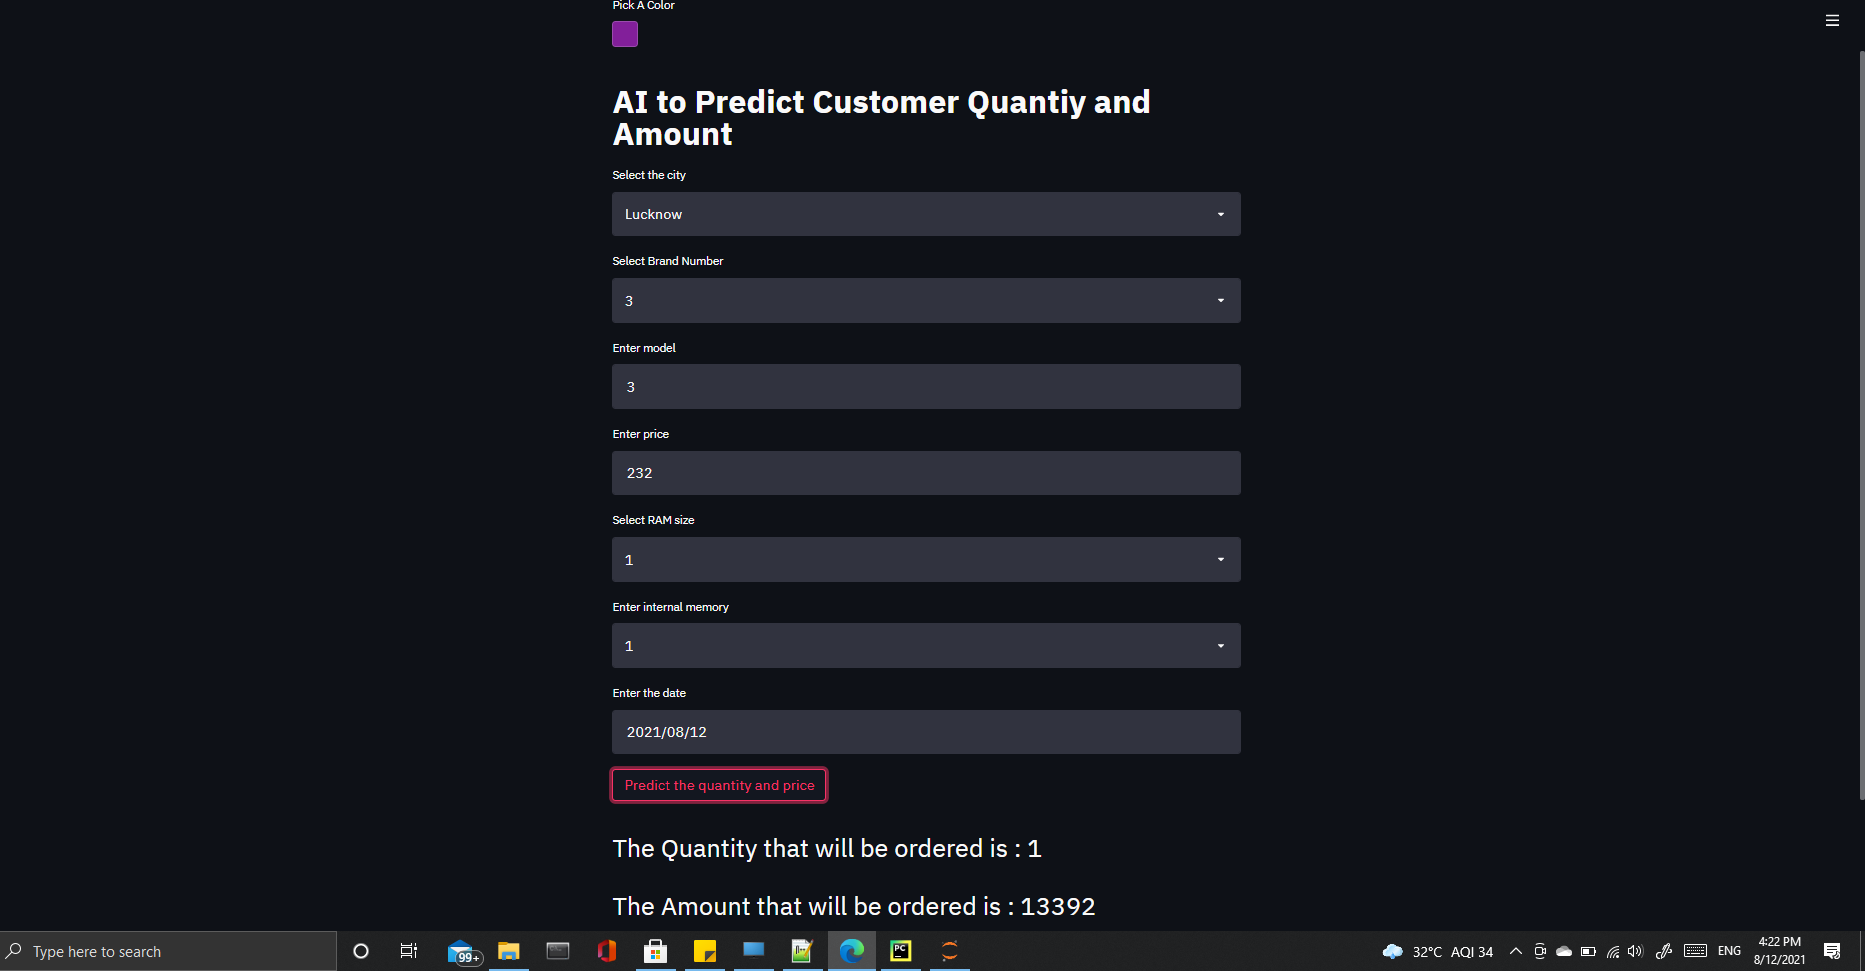

# This is done using Streamlit